데이터 출처 : UCI ML Repository
- https://archive.ics.uci.edu/ml/datasets/online+retail

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### 데이터 전처리

In [8]:
df = df[df['CustomerID'].notnull()].reset_index(drop=True).copy()

In [9]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [10]:
df = df[df['Quantity'] > 0 ].reset_index(drop=True).copy()
df = df[df['UnitPrice'] > 0 ].reset_index(drop=True).copy()

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


### 데이터 기초분석

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [15]:
df['Total'] = df['Quantity'] * df['UnitPrice']

In [16]:
df.Total.sum()

8911407.904

In [17]:
df_country = df.groupby(['Country'])['Total'].sum().reset_index()

In [18]:
df_country = df_country.sort_values(by='Total', ascending=False).head(10)

In [19]:
df_country

,Country,Total
35,United Kingdom,7308391.554
23,Netherlands,285446.340
10,EIRE,265545.900
14,Germany,228867.140
13,France,209024.050
0,Australia,138521.310
30,Spain,61577.110
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38378.330


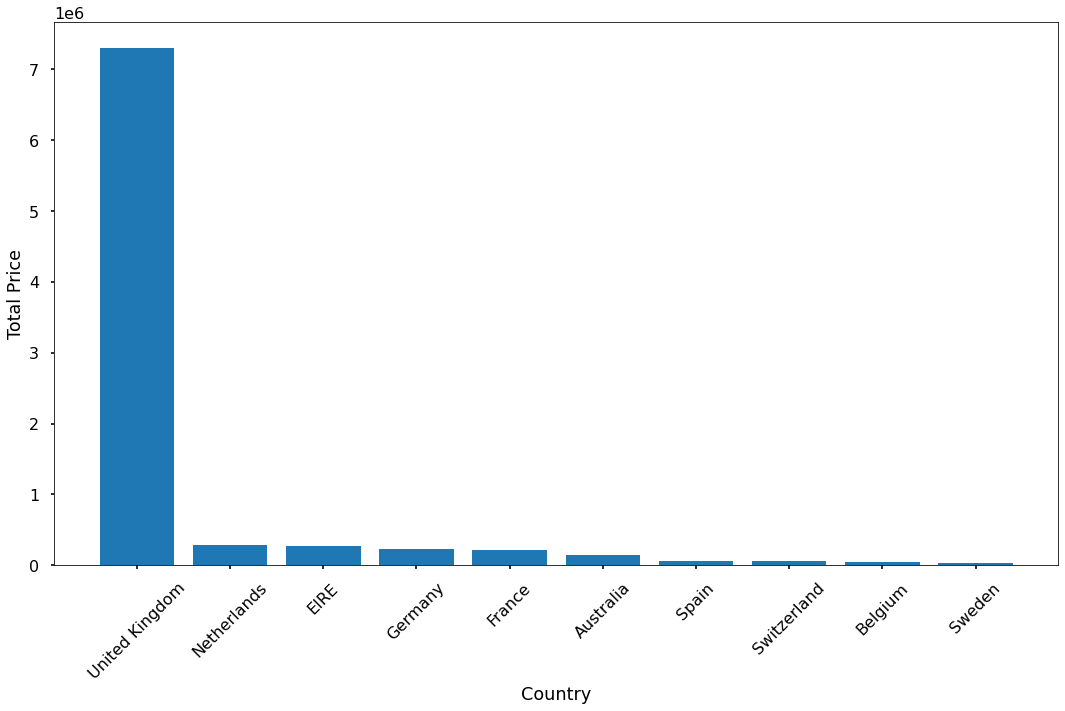

In [20]:
fig, ax = plt.subplots(figsize=(18,10))

plt.bar(df_country.Country, df_country.Total)
plt.xlabel('Country')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()

In [21]:
df['Month'] = df['InvoiceDate'].dt.month

In [22]:
df_month = df.groupby(['Month'])['Total'].sum().reset_index()

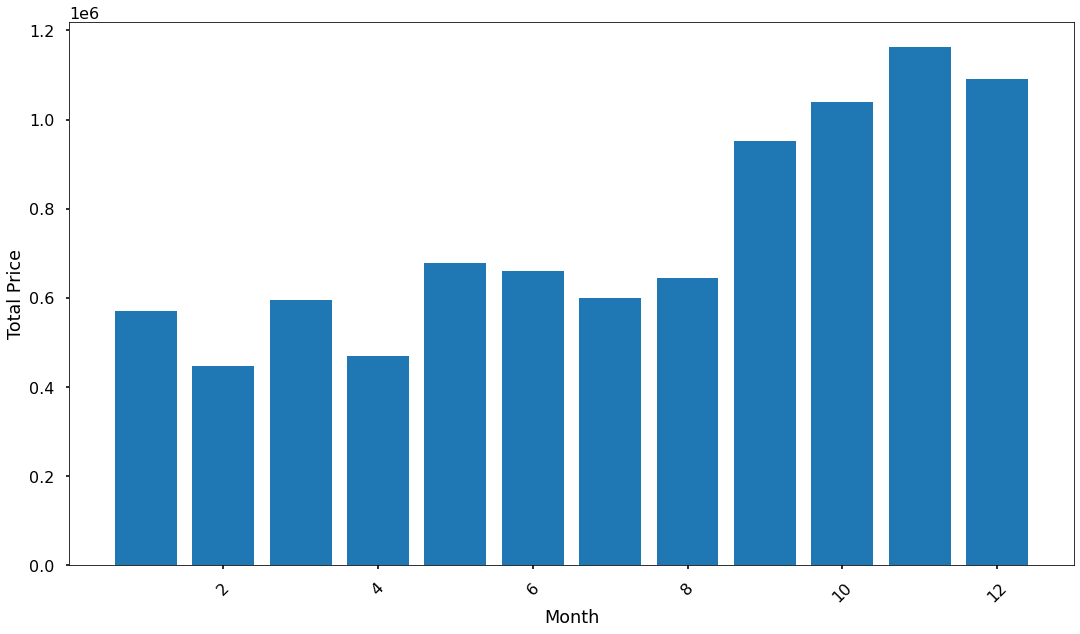

In [23]:
fig, ax = plt.subplots(figsize=(18,10))

plt.bar(df_month.Month, df_month.Total)
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()

In [24]:
df['Weekday'] = df['InvoiceDate'].dt.weekday

In [25]:
df_wkd = df.groupby('Weekday')[['Total']].sum().reset_index()

In [26]:
df_wkd

,Weekday,Total
0,0,1367146.411
1,1,1700634.631
2,2,1588336.170
3,3,1976859.070
4,4,1485917.401
5,6,792514.221


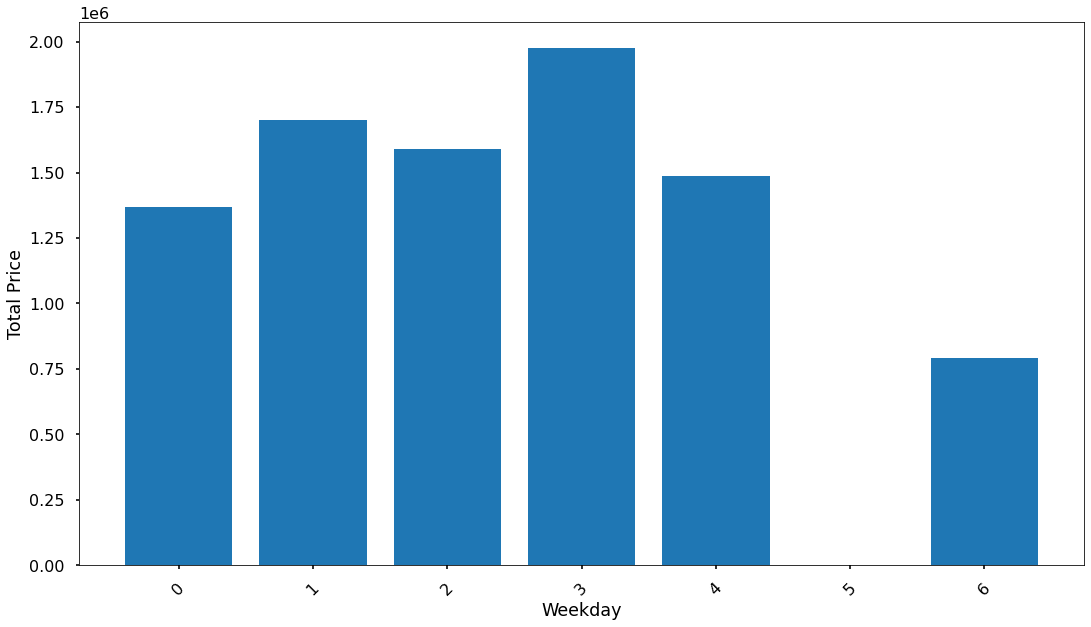

In [27]:
fig, ax = plt.subplots(figsize=(18,10))

plt.bar(df_wkd.Weekday, df_wkd.Total)
plt.xlabel('Weekday')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()

In [28]:
df['Date'] = df['InvoiceDate'].dt.date

In [29]:
df_date = df.groupby(['Date'])['Total'].sum().reset_index()

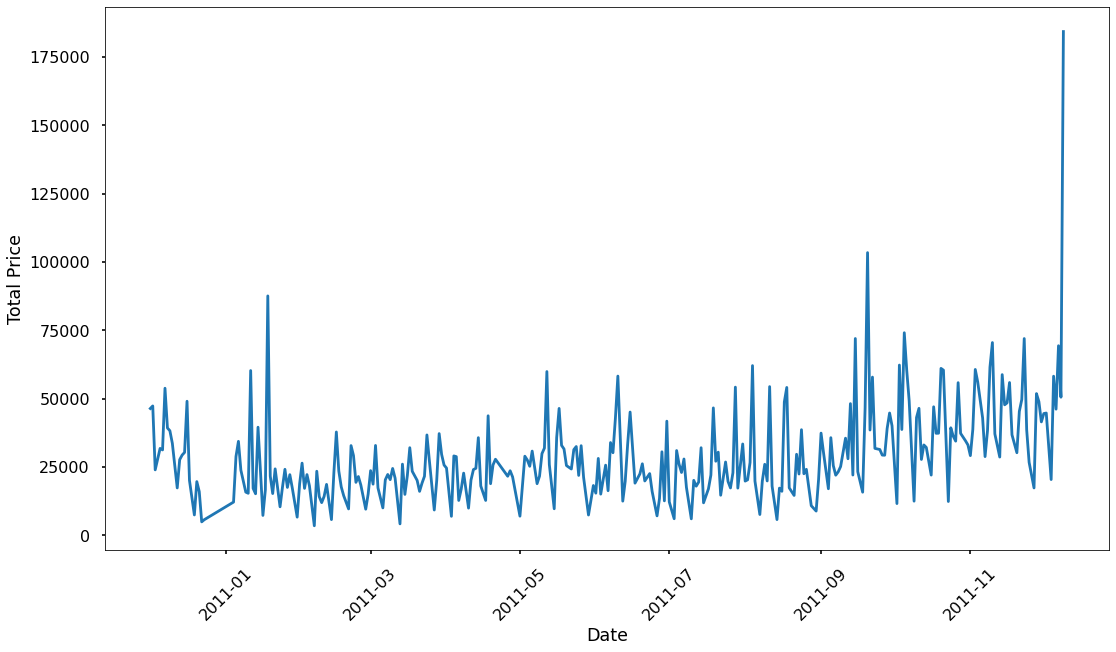

In [30]:
fig, ax = plt.subplots(figsize=(18,10))

plt.plot(df_date.Date, df_date.Total)
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()

In [31]:
df.groupby(['StockCode'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

,StockCode,Quantity
2329,23843,80995
1927,23166,77916
2499,84077,54415
1018,22197,49183
3343,85099B,46181
3349,85123A,36782
2602,84879,35362
353,21212,33693
1849,23084,27202
1282,22492,26076


In [32]:
df.groupby(['StockCode'])['Total'].sum().reset_index().sort_values(by='Total', ascending=False).head(10)

,StockCode,Total
2329,23843,168469.60
1218,22423,142592.95
3349,85123A,100603.50
3343,85099B,85220.78
1927,23166,81416.73
3664,POST,77803.96
2406,47566,68844.33
2602,84879,56580.34
3662,M,53779.93
1849,23084,51346.20


In [33]:
df[df['StockCode'] == 23843]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month,Weekday,Date
397411,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,12,4,2011-12-09
